In [5]:
4+5
a = 4+5
a

9

In [6]:
A = 'Bacteria'
B = 'Virus'
print('wow we have {}'.format(A+B))

wow we have BacteriaVirus


In [7]:
A[-1:]

'a'

In [8]:
A[::-1]

'airetcaB'

In [ ]:
name = 'Sudip'
last = 'Singh'
full = name+' '+last
print(full)

ListStates = ['UP','Bihar','MP','Delhi','Haryana']
ListInfected = [1000,3000,1500,2000,2500]
Recovered = (200,300,400,500,100)
InfectedDict = {'UP':1000,'Bihar':3000,'MP':1500,'Delhi':2000,'Haryana':2500}

In [5]:
Base = 1234
Ch10 = 12
Ch11 = 2
Ch12 = 13
Case12 = Base-Ch12
Case11 = Case12-Ch11
Case10 = Case11-Ch10
ChBasePer = (Base-Case12)*100/Case12
ChCase12Per = (Case12-Case11)*100/Case11
ChCase11Per = (Case11-Case10)*100/Case10
print(ChBasePer)
print(ChCase12Per)
print(ChCase11Per)



1.0647010647010646
0.16406890894175555
0.9942004971002486


                   Cured   Deaths  Confirmed   Population       IFR       CMR
State                                                                        
Delhi          1010544.0  60057.0  2003459.0   16787941.0  2.997666  0.357739
Haryana         172637.0   4339.0   312355.0   25351462.0  1.389125  0.017115
Uttar Pradesh   393201.0  18449.0   670122.0  199812341.0  2.753081  0.009233
     Updated On  State Test positivity rate  Tests per thousand
630  01/04/2020  Delhi                0.00%                0.13
631  07/04/2020  Delhi                6.37%                0.46
632  09/04/2020  Delhi                7.22%                0.50
633  10/04/2020  Delhi                8.16%                0.56
634  11/04/2020  Delhi                9.13%                0.59
     Updated On  State Test positivity rate  Tests per thousand
715  01/07/2020  Delhi               16.28%               27.84
716  02/07/2020  Delhi               16.10%               28.90
717  03/07/2020  Delhi            

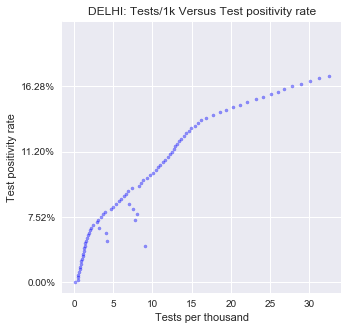

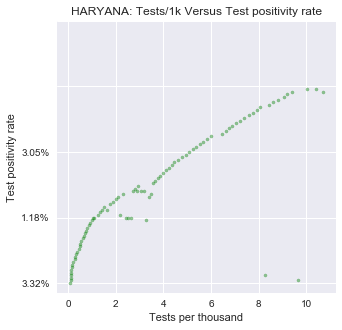

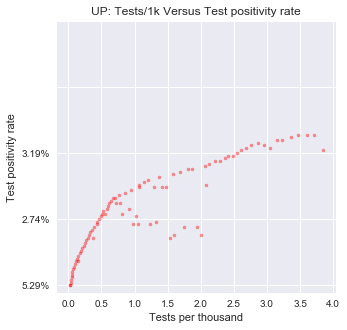

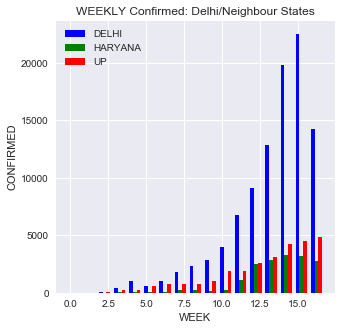

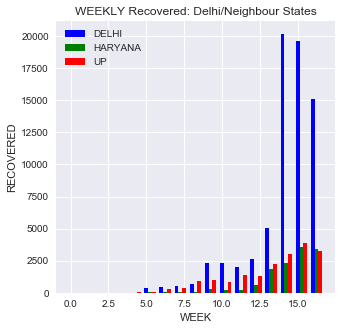

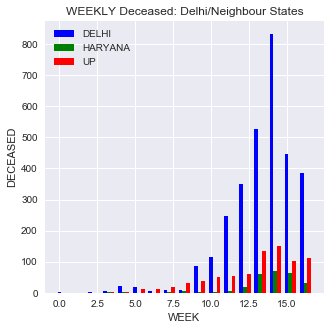

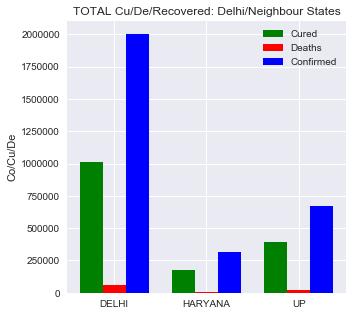

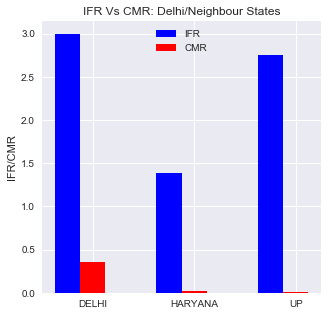

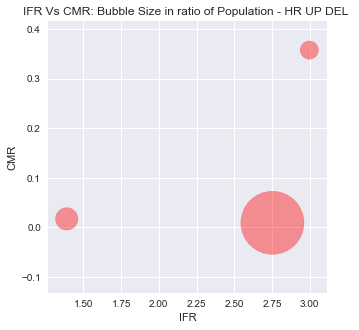

In [192]:
import numpy as np
import pandas as pd
from tkinter import *

CovidDF = pd.read_csv("States_covid_19_india.csv").drop(columns = 'Sno')
PoplDF = pd.read_csv("population_india_census2011.csv").sort_values(by=['State / Union Territory'])
PoplDF.set_index("State / Union Territory", inplace = True)
CovidData = CovidDF.groupby('State/UnionTerritory').sum()
PoplData = pd.DataFrame(PoplDF['Population'])
FinalData = pd.concat([CovidData, PoplData], axis=1, sort=True).dropna().rename_axis("State")
FinalData['IFR'] = FinalData.apply(lambda row: (row.Deaths*100)/row.Confirmed, axis = 1)
FinalData['CMR'] = FinalData.apply(lambda row: (row.Deaths*100)/row.Population, axis = 1)
#print(FinalData)
FinalSELECT = FinalData.loc[['Delhi','Haryana','Uttar Pradesh']]
print(FinalSELECT)

############################################### TKINTER ########################################
root = Tk()
root.title('PANDEMIC ANALYTICS ENGINE')

def selected(event):
    myLabel = Label(root, text = clicked.get())
    Data = FinalData.loc[FinalData['State'] == clicked.get()]
    myLabel = Label(root, text = Data['Population']).pack()
    
Options = FinalData.index.values.tolist()
clicked= StringVar()
clicked.set(Options[0])
drop = OptionMenu(root, clicked, *Options, command=selected)
drop.pack(pady=20)

#myButton = Button(root, text = 'Select State/UT',command=selected)
#myButton.pack()
root.mainloop()

##################################################################################################

################## MINOR PROJECT (USES PREVIOUS WORK AS WELL) ####################################

##################################################################################################

import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('seaborn')

CovidTEST = pd.read_csv("statewise_tested_numbers_data.csv")
CovidTestFILT = CovidTEST[['Updated On','State','Test positivity rate','Tests per thousand']].dropna()
CovidTestDL = CovidTestFILT[CovidTestFILT['State']=='Delhi']
CovidTestHR = CovidTestFILT[CovidTestFILT['State']=='Haryana']
CovidTestUP = CovidTestFILT[CovidTestFILT['State']=='Uttar Pradesh']

#plt.figure(figsize=(5,5))
#r0 = np.arange(len(CovidTestDL))
#plt.plot(r0,CovidTestDL['Test positivity rate'])
#plt.yticks([0,25,50,75,100])

plt.figure(figsize=(5,5))
plt.scatter(CovidTestDL['Tests per thousand'], CovidTestDL['Test positivity rate'], s=10, c="b", alpha=0.4)
plt.yticks([0,25,50,75,100])
plt.title("DELHI: Tests/1k Versus Test positivity rate")
plt.xlabel("Tests per thousand")
plt.ylabel("Test positivity rate")

plt.figure(figsize=(5,5))
plt.scatter(CovidTestHR['Tests per thousand'], CovidTestHR['Test positivity rate'], s=10, c="g", alpha=0.4)
plt.yticks([0,25,50,75,100])
plt.title("HARYANA: Tests/1k Versus Test positivity rate")
plt.xlabel("Tests per thousand")
plt.ylabel("Test positivity rate")

plt.figure(figsize=(5,5))
plt.scatter(CovidTestUP['Tests per thousand'], CovidTestUP['Test positivity rate'], s=10, c="r", alpha=0.4)
plt.yticks([0,25,50,75,100])
plt.title("UP: Tests/1k Versus Test positivity rate")
plt.xlabel("Tests per thousand")
plt.ylabel("Test positivity rate")

print(CovidTestDL.head())
print(CovidTestDL.tail())


CovidALL = pd.read_csv("state_wise_daily.csv")
CovidDL = CovidALL[['Date','Status','DL','HR','UP']]


CovidDLConf = CovidDL[CovidDL['Status']=='Confirmed']
CovidDLReco = CovidDL[CovidDL['Status']=='Recovered']
CovidDLDece = CovidDL[CovidDL['Status']=='Deceased']


WEEK = [0]*len(CovidDLConf)
for x in range(0,len(CovidDLConf)):
    WEEK[x] = np.floor(abs(x-len(CovidDLConf))/7)

CovidDLConf.insert(0, "WEEK", WEEK, True) 
CovidDLReco.insert(0, "WEEK", WEEK, True) 
CovidDLDece.insert(0, "WEEK", WEEK, True) 

CovidDLConfWEEK = CovidDLConf.groupby('WEEK').sum().sort_index(axis = 0,ascending=False) 
CovidDLRecoWEEK = CovidDLReco.groupby('WEEK').sum().sort_index(axis = 0,ascending=False)  
CovidDLDeceWEEK = CovidDLDece.groupby('WEEK').sum().sort_index(axis = 0,ascending=False) 


barWidth = 0.25
r1 = np.arange(len(CovidDLConfWEEK))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

#plt.subplot(4,1,1)
plt.figure(figsize=(5,5))
plt.bar(r1,CovidDLConfWEEK['DL'], color = 'b', width = 0.25, label = 'DELHI')
plt.bar(r2,CovidDLConfWEEK['HR'], color = 'g', width = 0.25, label = 'HARYANA')
plt.bar(r3,CovidDLConfWEEK['UP'], color = 'r', width = 0.25, label = 'UP')
plt.title("WEEKLY Confirmed: Delhi/Neighbour States")
plt.xlabel("WEEK")
plt.ylabel("CONFIRMED")
plt.legend()

#plt.subplot(4,1,2)
plt.figure(figsize=(5,5))
plt.bar(r1,CovidDLRecoWEEK['DL'], color = 'b', width = 0.25, label = 'DELHI')
plt.bar(r2,CovidDLRecoWEEK['HR'], color = 'g', width = 0.25, label = 'HARYANA')
plt.bar(r3,CovidDLRecoWEEK['UP'], color = 'r', width = 0.25, label = 'UP')
plt.title("WEEKLY Recovered: Delhi/Neighbour States")
plt.xlabel("WEEK")
plt.ylabel("RECOVERED")
plt.legend()

#plt.subplot(4,1,3)
plt.figure(figsize=(5,5))
plt.bar(r1,CovidDLDeceWEEK['DL'], color = 'b', width = 0.25, label = 'DELHI')
plt.bar(r2,CovidDLDeceWEEK['HR'], color = 'g', width = 0.25, label = 'HARYANA')
plt.bar(r3,CovidDLDeceWEEK['UP'], color = 'r', width = 0.25, label = 'UP')
plt.title("WEEKLY Deceased: Delhi/Neighbour States")
plt.xlabel("WEEK")
plt.ylabel("DECEASED")
plt.legend()


r11 = np.arange(len(FinalSELECT))
r22 = [x + barWidth for x in r11]
r33 = [x + barWidth for x in r22]

#plt.subplot(4,1,4)
plt.figure(figsize=(5,5))
plt.bar(r11,FinalSELECT['Cured'], color = 'g', width = 0.25)
plt.bar(r22,FinalSELECT['Deaths'], color = 'r', width = 0.25)
plt.bar(r33,FinalSELECT['Confirmed'], color = 'b', width = 0.25)
#plt.xlabel("State")
plt.xticks([r + barWidth for r in range(len(FinalSELECT))], ['DELHI', 'HARYANA', 'UP'])
plt.title("TOTAL Cu/De/Recovered: Delhi/Neighbour States")
plt.ylabel("Co/Cu/De")
plt.legend(FinalSELECT)

plt.figure(figsize=(5,5))
plt.bar(r11,FinalSELECT['IFR'], color = 'b', width = 0.25, label = 'IFR')
plt.bar(r22,FinalSELECT['CMR'], color = 'r', width = 0.25, label = 'CMR')
#plt.xlabel("State")
plt.xticks([r + barWidth for r in range(len(FinalSELECT))], ['DELHI', 'HARYANA', 'UP'])
plt.title("IFR Vs CMR: Delhi/Neighbour States")
plt.ylabel("IFR/CMR")
plt.legend()

plt.figure(figsize=(5,5))
plt.scatter(FinalSELECT['IFR'], FinalSELECT['CMR'], s=FinalSELECT['Population']/50000, c="red", alpha=0.4)
plt.title("IFR Vs CMR: Bubble Size in ratio of Population - HR UP DEL ")
plt.xlabel("IFR")
plt.ylabel("CMR")




plt.show()